In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns    #for visulization & data analysis
import plotly.express as px
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('https://thingspeak.com/channels/1823675/feed.csv')


df.head(500)

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-05-18 01:57:24 UTC,1692,0,0,-9.36,-0.22,0.58,-0.06,0.02,0.02
1,2023-05-18 01:57:40 UTC,1693,0,-10,-9.37,-0.23,0.59,-0.06,0.02,0.02
2,2023-05-18 01:57:55 UTC,1694,0,8,-9.36,-0.23,0.59,-0.06,0.02,0.02
3,2023-05-18 01:58:11 UTC,1695,0,7,-9.36,-0.23,0.61,-0.06,0.02,0.02
4,2023-05-18 01:58:26 UTC,1696,0,14,-9.36,-0.24,0.60,-0.06,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...
95,2023-05-18 08:50:07 UTC,1787,0,7,-0.67,-0.36,9.22,-0.06,0.02,0.01
96,2023-05-18 08:50:23 UTC,1788,0,2,-0.66,-0.36,9.23,-0.06,0.02,0.01
97,2023-05-18 08:50:39 UTC,1789,0,4,-0.67,-0.36,9.21,-0.06,0.02,0.01
98,2023-05-18 08:50:54 UTC,1790,0,-2,-0.68,-0.37,9.22,-0.06,0.02,0.01


In [ ]:
df

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-05-18 01:57:24 UTC,1692,0,0,-9.36,-0.22,0.58,-0.06,0.02,0.02
1,2023-05-18 01:57:40 UTC,1693,0,-10,-9.37,-0.23,0.59,-0.06,0.02,0.02
2,2023-05-18 01:57:55 UTC,1694,0,8,-9.36,-0.23,0.59,-0.06,0.02,0.02
3,2023-05-18 01:58:11 UTC,1695,0,7,-9.36,-0.23,0.61,-0.06,0.02,0.02
4,2023-05-18 01:58:26 UTC,1696,0,14,-9.36,-0.24,0.60,-0.06,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...
95,2023-05-18 08:50:07 UTC,1787,0,7,-0.67,-0.36,9.22,-0.06,0.02,0.01
96,2023-05-18 08:50:23 UTC,1788,0,2,-0.66,-0.36,9.23,-0.06,0.02,0.01
97,2023-05-18 08:50:39 UTC,1789,0,4,-0.67,-0.36,9.21,-0.06,0.02,0.01
98,2023-05-18 08:50:54 UTC,1790,0,-2,-0.68,-0.37,9.22,-0.06,0.02,0.01


In [ ]:
df.describe()

,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
count,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,1741.500000,0.0,-1381.550000,-3.313500,-2.343100,5.430600,-0.081800,0.032700,0.01770
std,29.011492,0.0,4443.026158,3.732792,3.010869,4.426721,0.231283,0.136507,0.04292
min,1692.000000,0.0,-24450.000000,-9.370000,-9.900000,-2.970000,-2.370000,-0.060000,-0.04000
25%,1716.750000,0.0,-7.000000,-8.312500,-4.400000,0.730000,-0.060000,0.020000,0.01000
50%,1741.500000,0.0,-1.000000,-0.675000,-0.360000,9.175000,-0.060000,0.020000,0.01000
75%,1766.250000,0.0,2.000000,-0.637500,-0.350000,9.210000,-0.057500,0.020000,0.02000
max,1791.000000,0.0,10865.000000,0.280000,-0.220000,9.880000,-0.040000,1.380000,0.41000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  100 non-null    object 
 1   entry_id    100 non-null    int64  
 2   field1      100 non-null    int64  
 3   field2      100 non-null    int64  
 4   field3      100 non-null    float64
 5   field4      100 non-null    float64
 6   field5      100 non-null    float64
 7   field6      100 non-null    float64
 8   field7      100 non-null    float64
 9   field8      100 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

created_at    0
entry_id      0
field1        0
field2        0
field3        0
field4        0
field5        0
field6        0
field7        0
field8        0
dtype: int64

<Axes: >

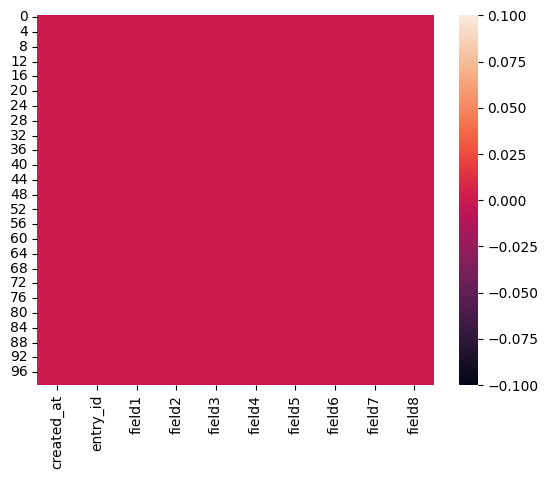

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
import plotly.express as px

fig = px.line(df, x="entry_id", y="field2", template="plotly_dark")
fig.show()


In [ ]:
#@title Operations { vertical-output: true }
count = 0
y = "field2"
tw = 1
while count >= 0:
    tw = tw + int(y[5:])  # Extract the numeric part of the string using slicing and convert it to an integer
    if tw > 20000:
        print("------------------------------Stop------------------------------")
        time.sleep(7)
        print("Resuming operation.......")
        time.sleep(3)
        tw = tw - 1000
        
    else:
        print("GO")
        time.sleep(0.0008)

    count += 1


    


Streaming output truncated to the last 5000 lines.
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
GO
G